In [4]:
%matplotlib inline
import string
import math
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle, sys, os, time
import numpy as np
import pydotplus
import pandas as pd
import scipy.stats as ss
from sklearn import neighbors, svm
from sklearn.neighbors.kde import KernelDensity
from sklearn import preprocessing as pp
from sklearn import tree

import read_database as rdb
import generate_orbits as go
import learn_data as ld
import visualize_data as vd
import asterion_learn as al
from  copy import deepcopy

font = {'size': 21}
mpl.rc('font', **font)

## Load datasets

In [5]:
dumps_gen_sg1 = ['./asteroid_data/haz_gen_sg1.p', 
                 './asteroid_data/nohaz_gen_sg1.p']
            
dumps_gen_sg2 = ['./asteroid_data/haz_gen_sg2.p', 
                 './asteroid_data/nohaz_gen_sg2.p']

dumps_gen_sg3 = ['./asteroid_data/haz_gen_sg3.p', 
                 './asteroid_data/nohaz_gen_sg3.p']

dumps_gen_sg4 = ['./asteroid_data/haz_gen_sg4.p', 
                 './asteroid_data/nohaz_gen_sg4.p']

dumps_gen_sg5 = ['./asteroid_data/haz_gen_sg5.p', 
                 './asteroid_data/nohaz_gen_sg5.p']

dumps_gen_sg6 = ['./asteroid_data/haz_gen_sg6.p', 
                 './asteroid_data/nohaz_gen_sg6.p']

haz_gen_sg1, nohaz_gen_sg1 = map(rdb.loadObject, dumps_gen_sg1)
haz_gen_sg2, nohaz_gen_sg2 = map(rdb.loadObject, dumps_gen_sg2)
haz_gen_sg3, nohaz_gen_sg3 = map(rdb.loadObject, dumps_gen_sg3)
haz_gen_sg4, nohaz_gen_sg4 = map(rdb.loadObject, dumps_gen_sg4)
haz_gen_sg5, nohaz_gen_sg5 = map(rdb.loadObject, dumps_gen_sg5)
haz_gen_sg6, nohaz_gen_sg6 = map(rdb.loadObject, dumps_gen_sg6)

In [6]:
dumps_genu_sg1 = ['./asteroid_data/haz_genu_sg1.p', 
                 './asteroid_data/nohaz_genu_sg1.p']

dumps_genu_sg2 = ['./asteroid_data/haz_genu_sg2.p', 
                 './asteroid_data/nohaz_genu_sg2.p']

dumps_genu_sg3 = ['./asteroid_data/haz_genu_sg3.p', 
                 './asteroid_data/nohaz_genu_sg3.p']

dumps_genu_sg4 = ['./asteroid_data/haz_genu_sg4.p', 
                 './asteroid_data/nohaz_genu_sg4.p']

dumps_genu_sg5 = ['./asteroid_data/haz_genu_sg5.p', 
                 './asteroid_data/nohaz_genu_sg5.p']

dumps_genu_sg6 = ['./asteroid_data/haz_genu_sg6.p', 
                 './asteroid_data/nohaz_genu_sg6.p']

haz_genu_sg1, nohaz_genu_sg1 = map(rdb.loadObject, dumps_genu_sg1)
haz_genu_sg2, nohaz_genu_sg2 = map(rdb.loadObject, dumps_genu_sg2)
haz_genu_sg3, nohaz_genu_sg3 = map(rdb.loadObject, dumps_genu_sg3)
haz_genu_sg4, nohaz_genu_sg4 = map(rdb.loadObject, dumps_genu_sg4)
haz_genu_sg5, nohaz_genu_sg5 = map(rdb.loadObject, dumps_genu_sg5)
haz_genu_sg6, nohaz_genu_sg6 = map(rdb.loadObject, dumps_genu_sg6)

In [7]:
dumps_gen_mg11 = ['./asteroid_data/haz_gen_mg11.p', 
                  './asteroid_data/nohaz_gen_mg11.p']

dumps_gen_mg12 = ['./asteroid_data/haz_gen_mg12.p', 
                  './asteroid_data/nohaz_gen_mg12.p']

dumps_gen_mg13 = ['./asteroid_data/haz_gen_mg13.p', 
                  './asteroid_data/nohaz_gen_mg13.p']

haz_gen_mg11, nohaz_gen_mg11 = map(rdb.loadObject, dumps_gen_mg11)
haz_gen_mg12, nohaz_gen_mg12 = map(rdb.loadObject, dumps_gen_mg12)
haz_gen_mg13, nohaz_gen_mg13 = map(rdb.loadObject, dumps_gen_mg13)

In [8]:
dumps_gen_mg11_extr = ['./asteroid_data/haz_gen_mg11_extr.p', 
                       './asteroid_data/nohaz_gen_mg11_extr.p']

dumps_gen_mg12_extr = ['./asteroid_data/haz_gen_mg12_extr.p', 
                       './asteroid_data/nohaz_gen_mg12_extr.p']

dumps_gen_mg13_extr = ['./asteroid_data/haz_gen_mg13_extr.p', 
                       './asteroid_data/nohaz_gen_mg13_extr.p']

haz_gen_mg11_extr, nohaz_gen_mg11_extr = map(rdb.loadObject, dumps_gen_mg11_extr)
haz_gen_mg12_extr, nohaz_gen_mg12_extr = map(rdb.loadObject, dumps_gen_mg12_extr)
haz_gen_mg13_extr, nohaz_gen_mg13_extr = map(rdb.loadObject, dumps_gen_mg13_extr)

In [9]:
dumps_gen_mg11_rest = ['./asteroid_data/haz_gen_mg11_rest.p', 
                       './asteroid_data/nohaz_gen_mg11_rest.p']

dumps_gen_mg12_rest = ['./asteroid_data/haz_gen_mg12_rest.p', 
                       './asteroid_data/nohaz_gen_mg12_rest.p']

dumps_gen_mg13_rest = ['./asteroid_data/haz_gen_mg13_rest.p', 
                       './asteroid_data/nohaz_gen_mg13_rest.p']

haz_gen_mg11_rest, nohaz_gen_mg11_rest = map(rdb.loadObject, dumps_gen_mg11_rest)
haz_gen_mg12_rest, nohaz_gen_mg12_rest = map(rdb.loadObject, dumps_gen_mg12_rest)
haz_gen_mg13_rest, nohaz_gen_mg13_rest = map(rdb.loadObject, dumps_gen_mg13_rest)

In [10]:
haz_gen_full = rdb.loadObject('./asteroid_data/haz_rand_2e5.p')
nohaz_gen_full = rdb.loadObject('./asteroid_data/nohaz_rand_2e5.p')

** Check subgroup **

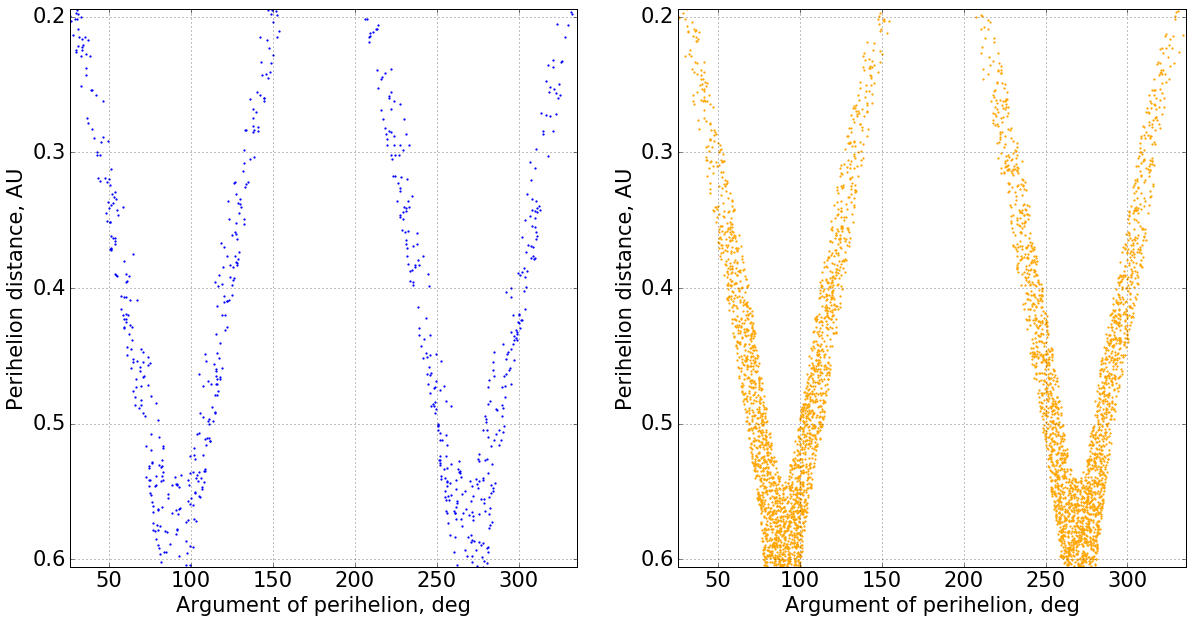

In [11]:
cutcol = ['w', 'q']
labels = [vd.colnames['w'], vd.colnames['q']]
vd.display_param2d(cutcol, labels, [haz_gen_sg6, nohaz_gen_sg6], invertaxes=[0,1]) #invertaxes=[0,1]

** Population ratio of hazardous asteroids in the analized subgroups **

In [12]:
haz_gen_preanl = pd.concat([haz_gen_sg6, haz_gen_sg5, haz_gen_sg1])

In [13]:
print float(len(haz_gen_preanl))/len(haz_gen_full)

0.725145311203


In [14]:
haz_gen_anl = pd.concat([haz_gen_sg6, haz_gen_sg5, haz_gen_mg11_extr, haz_gen_mg12_extr, haz_gen_mg13_extr])
nohaz_gen_anl = pd.concat([nohaz_gen_sg6, nohaz_gen_sg5, nohaz_gen_mg11_extr, nohaz_gen_mg12_extr, nohaz_gen_mg13_extr])

** Ratio of hazardous asteroids population in the extracted subgroups to the total population of subgroups **

In [15]:
haz_gen_anlpre_pop = float(len(haz_gen_anl))/len(haz_gen_preanl)
print haz_gen_anlpre_pop

0.959860620313


** Ratio of hazardous asteroids population in the extracted subgroups to the total population **

In [16]:
haz_gen_anl_pop = float(len(haz_gen_anl))/len(haz_gen_full)
print haz_gen_anl_pop

0.696038428228


** Population ratio of nonhazardous asteroids in the analized subgroups and minigroups **

In [17]:
nohaz_gen_anl_pop = float(len(nohaz_gen_anl))/len(nohaz_gen_full)
print nohaz_gen_anl_pop

0.0788418050205


** Total purity of outlined PHA clusters **

In [18]:
total_purity = 1 - float(len(nohaz_gen_anl))/len(haz_gen_anl)
print total_purity

0.911002219172


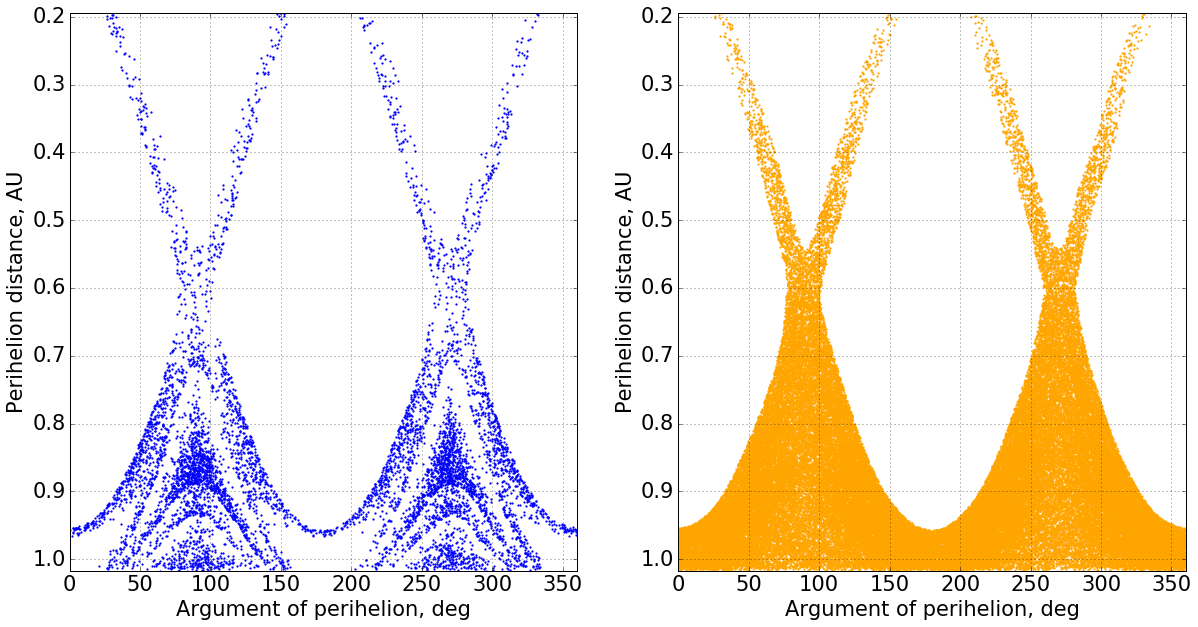

In [19]:
vd.display_param2d(cutcol, labels, [haz_gen_anl, nohaz_gen_anl], invertaxes=[0,1])

In [20]:
# vd.display_allparams([haz_gen_anl, nohaz_gen_anl], vd.combs, vd.colnames)

In [21]:
# haz_gen_anl = pd.concat([haz_gen_sg6, haz_gen_sg5, haz_gen_mg11_extr, haz_gen_mg12_extr, haz_gen_mg13_extr])
# nohaz_gen_anl = pd.concat([nohaz_gen_sg6, nohaz_gen_sg5, nohaz_gen_mg11_extr, nohaz_gen_mg12_extr, nohaz_gen_mg13_extr])

** Merge rest of subgrous into a background cluster**

In [22]:
haz_gen_bg = pd.concat([haz_genu_sg2, haz_genu_sg3, haz_genu_sg4])
nohaz_gen_bg = pd.concat([nohaz_genu_sg2, nohaz_genu_sg3, nohaz_genu_sg4])

In [23]:
# vd.display_param2d(cutcol, labels, [haz_gen_bg, nohaz_gen_bg], invertaxes=[0,1])

** Merge subgroups 5 and 6 into one cluster **

In [24]:
haz_gen_sg56 = pd.concat([haz_genu_sg5, haz_genu_sg6])
nohaz_gen_sg56 = pd.concat([nohaz_genu_sg5, nohaz_genu_sg6])

In [25]:
# vd.display_param2d(cutcol, labels, [haz_gen_sg56, nohaz_gen_sg56], invertaxes=[0,1])

** Identifiy subgroups and minigroups **

In [26]:
def mg_trainset(n, haz=None, nohaz=None, cutcol=['w', 'q']):
    if nohaz is None:
        mg_cut = haz[cutcol].as_matrix()
#         mg_cut = np.asarray(ld.cut_2params(cutcol, [haz]))
#         print mg_cut
    elif haz is None:
        mg_cut = nohaz[cutcol].as_matrix()
#         mg_cut = np.asarray(ld.cut_2params(cutcol, [nohaz]))
    else:
        haz_cut, nohaz_cut = ld.cut_2params(cutcol, [haz, nohaz])
        mg_cut = np.concatenate((haz_cut, nohaz_cut))
    print mg_cut.shape
    mg_idcol = np.array([[n]*len(mg_cut)]).T
    mg_train = np.append(mg_cut, mg_idcol, axis=1) 
    return mg_train

In [52]:
cutcol = ['w', 'q']
mg11_train = mg_trainset(1, haz_gen_mg11, nohaz_gen_mg11, cutcol)
mg12_train = mg_trainset(2, haz_gen_mg12, nohaz_gen_mg12, cutcol)
mg13_train = mg_trainset(3, haz_gen_mg13, nohaz_gen_mg13, cutcol)
sg56_train = mg_trainset(4, haz_gen_sg56, nohaz_gen_sg56, cutcol=cutcol)
bg_train = mg_trainset(5, haz_gen_bg, nohaz_gen_bg, cutcol=cutcol)
# sg56_train = mg_trainset(4, haz=haz_gen_sg56, cutcol=cutcol)
# bg_train = mg_trainset(5, nohaz=nohaz_gen_bg, cutcol=cutcol)

(20176L, 2L)
(15629L, 2L)
(32618L, 2L)
(52467L, 2L)
(54595L, 2L)


** Prepare training set for classification **

In [53]:
merged = np.concatenate((mg11_train, mg12_train, mg13_train, sg56_train, bg_train))
data = np.random.permutation(merged)
xtrain, ytrain = ld.split_by_lastcol(data)

** Normalize training dataset **

In [54]:
xtrain_norm, scales = al.normalize_dataset(xtrain)

** Classify **

In [73]:
from sklearn import ensemble
clf_svm = svm.SVC(gamma=300., C=100.)
# clf_svm = svm.SVC(gamma=300., C=100.)
# clf_svm = neighbors.KNeighborsClassifier(n_neighbors=10) # weights='distance'
# clf_svm = ensemble.RandomForestClassifier(n_estimators=100)
# clf_svm = tree.DecisionTreeClassifier()
clf_svm = clf_svm.fit(xtrain_norm, ytrain)

In [76]:
labels = [vd.colnames['w'], vd.colnames['q']]
subgroups = ['other', 'subgroups 5, 6', 'minigroup 1.3', 'minigroup 1.2', 'minigroup 1.1']

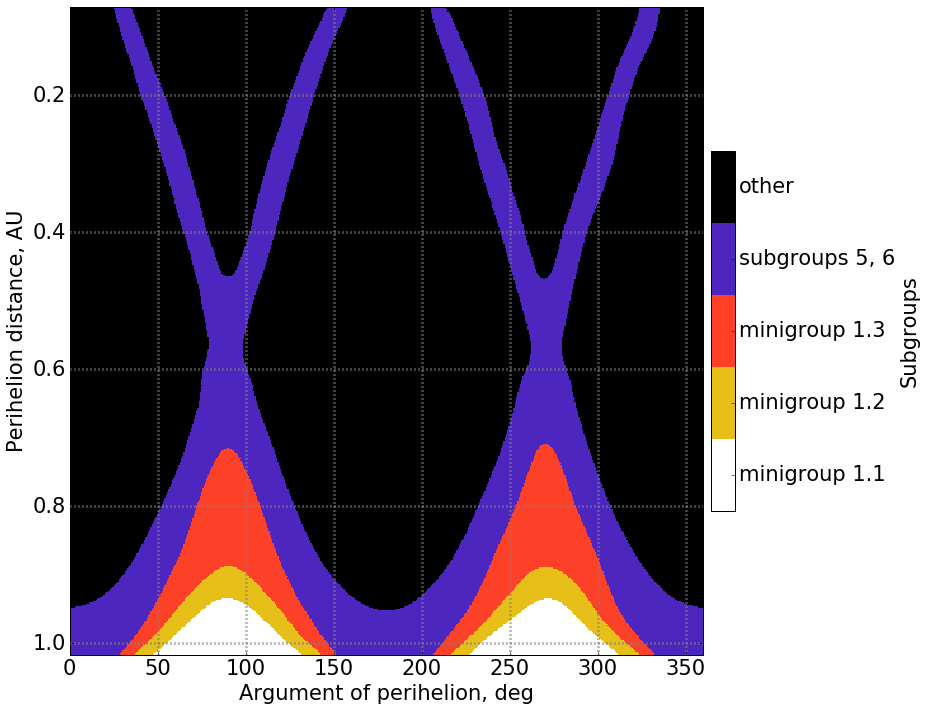

In [77]:
reload(vd)
vd.plot_classifier(xtrain_norm, clf_svm, num=500, cmap='CMRmap_r', figsize=(11,10),
                   labels=labels, invertaxes=[0,1], scales=scales, subgroups=subgroups, grid_color='grey')